In [1]:
# Import Dependencies
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# Load csv into DataFrame
df_earthquakes = pd.read_csv("Resources/eq_data.csv")

In [3]:
# Connect to/Create database
conn = sqlite3.connect("Resources/earthquakes.sqlite")

In [4]:
# Write the dataframe to the earthquakes database into eq_data table
df_earthquakes.to_sql("eq_data", conn, if_exists="replace", index=False)

7449

In [5]:
# Load SELECT data into DataFrame
df_magnitude_by_magType = pd.read_sql_query("SELECT mag, magType FROM eq_data", conn)

In [6]:
# Calculate the mean magnitude for each magType
df_grouped = df_magnitude_by_magType.groupby("magType").mean()
df_grouped

,mag
magType,
Ml,3.600000
ma,3.000000
mb,3.650000
mc,3.114615
md,3.159779
mh,3.415385
ml,3.324466
mlr,3.804760
mw,3.828904


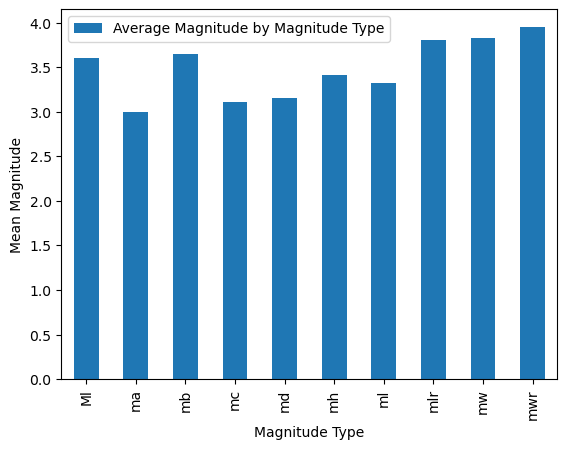

In [7]:
# Plot the mean magnitude by magnitude type
df_grouped.plot(kind="bar")

# Label x and y axis
plt.xlabel("Magnitude Type")
plt.ylabel("Mean Magnitude")
plt.legend(["Average Magnitude by Magnitude Type"])

# Show the plot
plt.show()

In [8]:
# Load SELECT data into DataFrame
df_magnitude_by_time = pd.read_sql_query("SELECT time, mag FROM eq_data", conn)
df_magnitude_by_time


,time,mag
0,2022-12-31T12:12:26.650Z,4.14
1,2022-12-31T11:41:09.460Z,3.47
2,2022-12-22T02:22:50.250Z,3.34
3,2022-12-20T15:30:01.280Z,3.01
4,2022-12-17T11:39:42.860Z,3.57
...,...,...
7444,2000-01-06T21:38:10.940Z,3.85
7445,2000-01-03T21:59:31.780Z,3.49
7446,2000-01-02T17:58:32.820Z,3.14
7447,2000-01-02T15:49:40.650Z,3.11


In [9]:
# Create a new dataframe with the converted date column
df_converted_mag_by_year = df_magnitude_by_time.copy()
df_converted_mag_by_year['year'] = pd.to_datetime(df_converted_mag_by_year['time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.year
df_converted_mag_by_year

,time,mag,year
0,2022-12-31T12:12:26.650Z,4.14,2022
1,2022-12-31T11:41:09.460Z,3.47,2022
2,2022-12-22T02:22:50.250Z,3.34,2022
3,2022-12-20T15:30:01.280Z,3.01,2022
4,2022-12-17T11:39:42.860Z,3.57,2022
...,...,...,...
7444,2000-01-06T21:38:10.940Z,3.85,2000
7445,2000-01-03T21:59:31.780Z,3.49,2000
7446,2000-01-02T17:58:32.820Z,3.14,2000
7447,2000-01-02T15:49:40.650Z,3.11,2000


In [10]:
# Data types
check_dt = df_converted_mag_by_year.dtypes
print(check_dt)

time     object
mag     float64
year      int64
dtype: object


In [11]:
df_mag_year = pd.DataFrame(df_converted_mag_by_year.groupby(["year"])["mag"].mean())
df_mag_year

,mag
year,
2000,3.357956
2001,3.344212
2002,3.339188
2003,3.414804
2004,3.404423
2005,3.438697
2006,3.392437
2007,3.413061
2008,3.413532


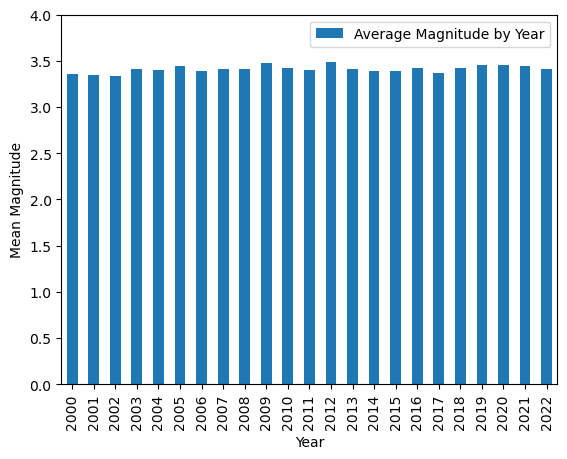

In [12]:
# Plot the mean magnitude by magnitude type
df_mag_year.plot(kind="bar")

# Label x and y axis
plt.xlabel("Year")
plt.ylabel("Mean Magnitude")
plt.yticks([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0])
plt.legend(["Average Magnitude by Year"])

# Show the plot
plt.show()

In [13]:
df_mag_count = pd.DataFrame(df_converted_mag_by_year.groupby(["year"])["mag"].count())
df_mag_count

,mag
year,
2000,318
2001,311
2002,197
2003,408
2004,364
2005,261
2006,197
2007,196
2008,201


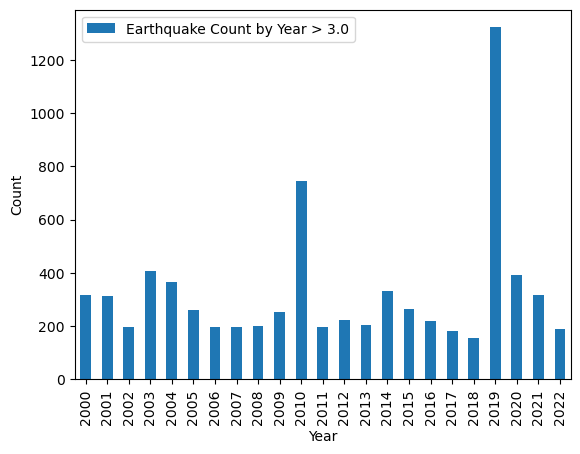

In [14]:
# Plot the count of magnitude 3.0 tremor by year
df_mag_count.plot(kind="bar")

# Label x and y axis
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["Earthquake Count by Year > 3.0"])

# Show the plot
plt.show()